In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax  = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('Pennies.jpg')

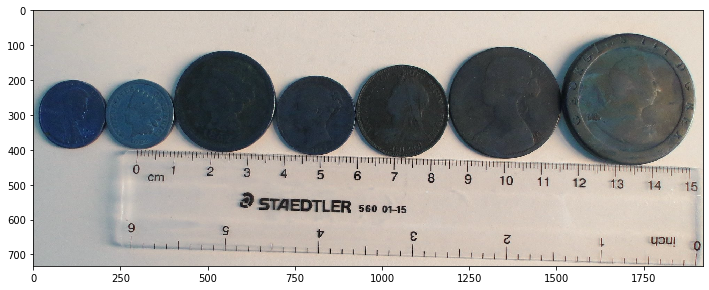

In [4]:
display(sep_coins)

In [5]:
#Median Blur 
#GrayScale
#Binary Threshold
#Find Contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

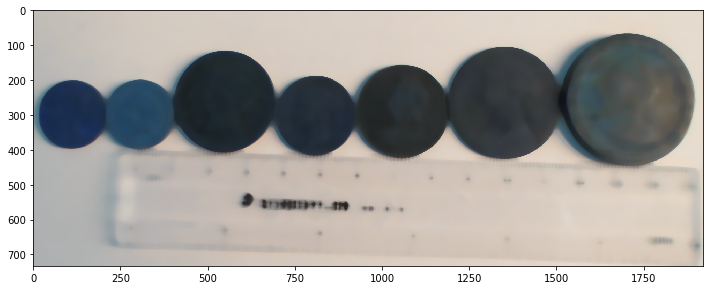

In [66]:
display(sep_blur)

In [67]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

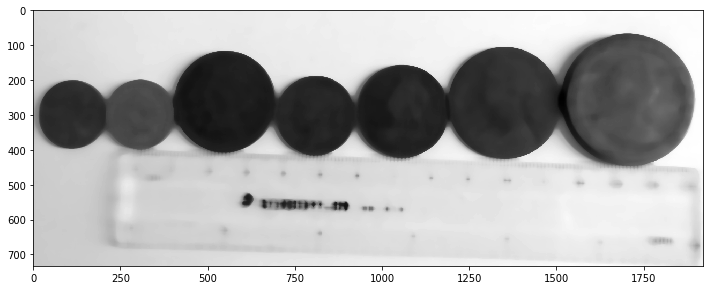

In [68]:
display(gray_sep_coins)

In [69]:
 ret ,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

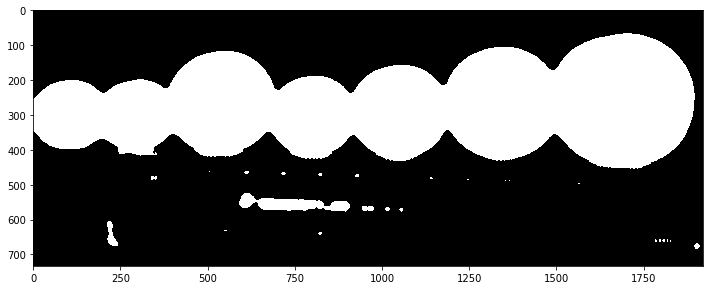

In [70]:
display(sep_thresh)

In [71]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [72]:
for i in range (len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)        

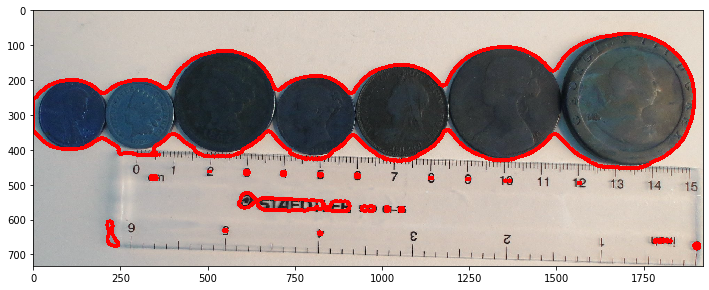

In [73]:
display(sep_coins)

In [74]:
#PART 2

In [75]:
img = cv2.imread('Pennies.jpg')
img = cv2.medianBlur(img,35)

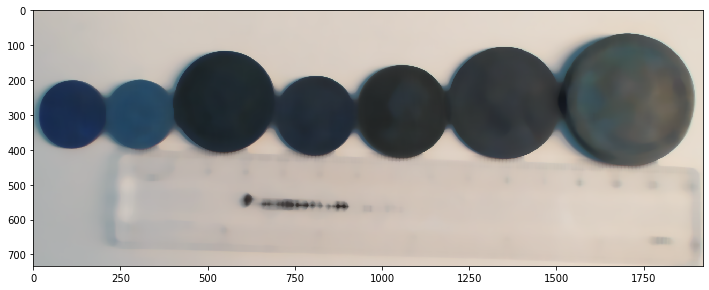

In [76]:
display(img)

In [77]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [78]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

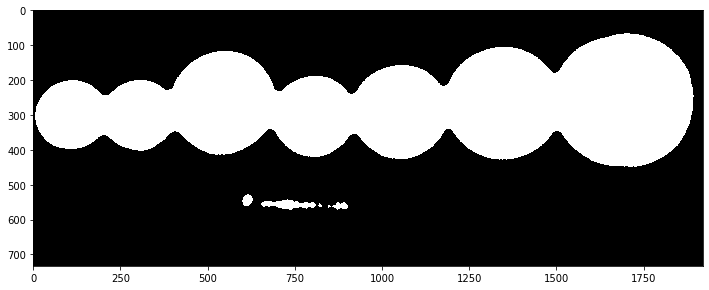

In [79]:
display(thresh)

In [80]:
#NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)

In [81]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [82]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)

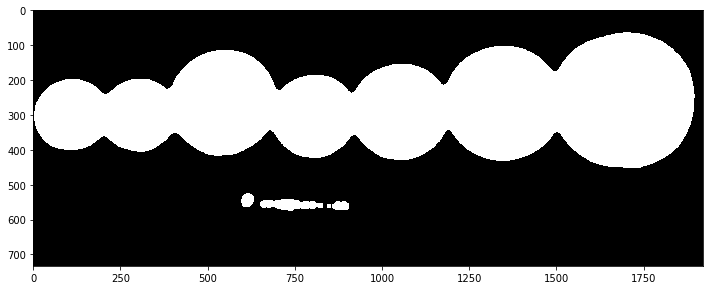

In [83]:
display(sure_bg)

In [84]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

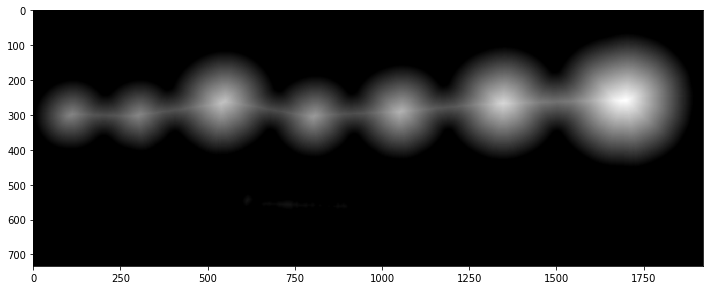

In [85]:
display(dist_transform)

In [86]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

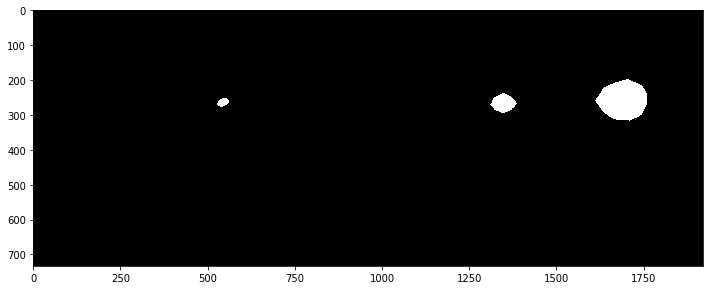

In [87]:
display(sure_fg)

In [88]:
sure_fg = np.uint8(sure_fg)

In [89]:
unknown = cv2.subtract(sure_bg,sure_fg)

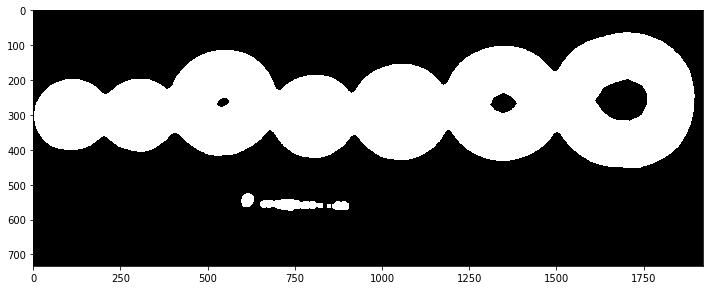

In [90]:
display(unknown)

In [91]:
ret,makers = cv2.connectedComponents(sure_fg)

In [92]:
makers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [93]:
makers = makers +1

In [94]:
makers[unknown == 255]

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

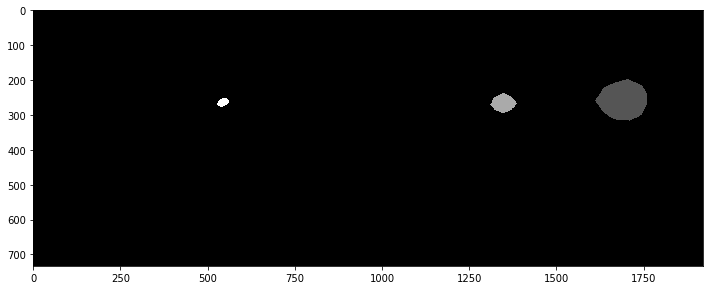

In [95]:
display(makers)

In [96]:
markers = cv2.watershed(img,makers)

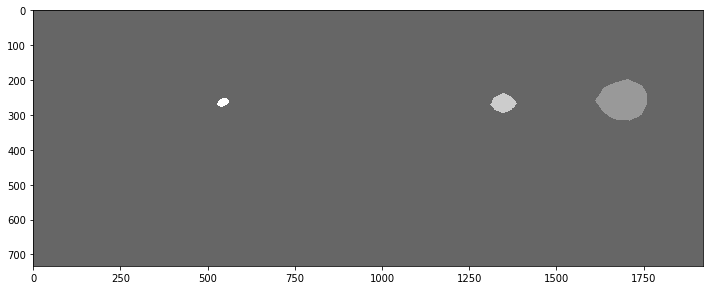

In [97]:
display(markers)

In [98]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

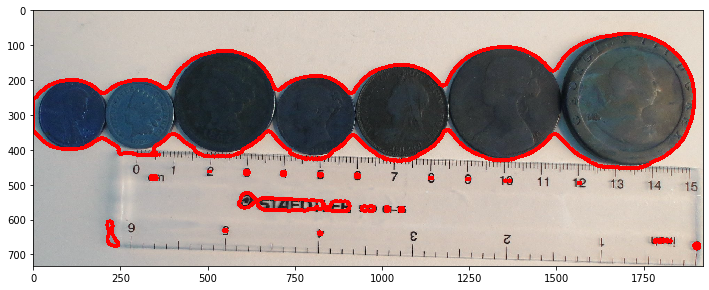

In [99]:
display(sep_coins)